In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np #Libreria numerica
import scipy as sc #Expansion de numpy
from sklearn.datasets import make_circles

11493376/11490434 [==============================] - 0s 0us/step
8


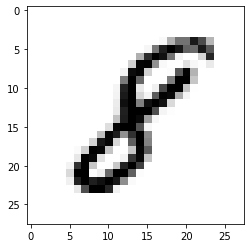

In [0]:
#Creacion del DATASET

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

image_index = 7777 # Podemos seleccionar cualquier valor menor de 60.000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
x_train.shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 37s 625us/step - loss: 0.2091 - accuracy: 0.9372
Epoch 2/10
60000/60000 [==============================] - 37s 625us/step - loss: 0.0817 - accuracy: 0.9743
Epoch 3/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.0556 - accuracy: 0.9820
Epoch 4/10
42944/60000 [====================>.........] - ETA: 10s - loss: 0.0408 - accuracy: 0.9866

KeyboardInterrupt: ignored

In [0]:
model.evaluate(x_test, y_test)

In [0]:
image_index = 9999
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
#print(pred.argmax())
#PATATA
#Combo sopy un ttonto de lo s huevos